In [1]:
import deepSI
from matplotlib import pyplot as plt
from scipy.io import loadmat
full = deepSI.datasets.Silverbox(split_data=False)
test = full.sdl[1][100:40575]
train, val = deepSI.datasets.Silverbox()
from encoder_LPV_models import LPV_multi_encoder, LPV_single_encoder

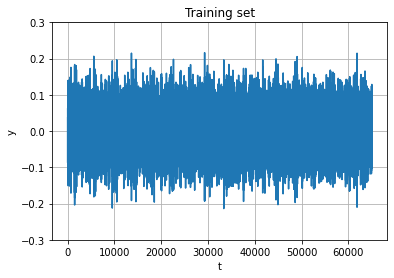

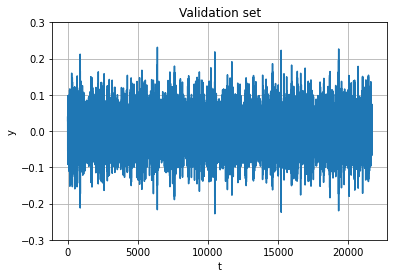

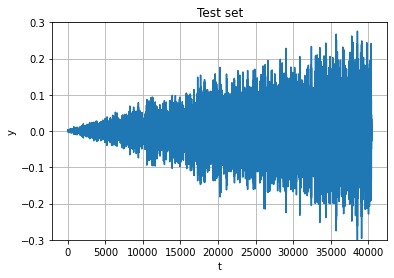

In [4]:
train.plot()
plt.title('Training set')
plt.grid()
plt.ylim(-0.3,0.3)
plt.show()

val.plot()
plt.title('Validation set')
plt.grid()
plt.ylim(-0.3,0.3)
plt.show()

test.plot()
plt.title('Test set')
plt.ylim(-0.3,0.3)
plt.grid()
plt.show()

In [ ]:
#########################################################
# LPV-SUBNET with two states and one scheduling parameter
#########################################################

In [6]:
sys = LPV_single_encoder(nx=2, Np=1, na=10, nb=10, feedthrough=True, include_u_in_p=True, f_net_kwargs=dict(F=10), \
                        e_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1), \
                        p_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1))
sys.init_model(sys_data=train)

In [ ]:
sys.fit(train, train[-30000:], epochs = 300, loss_kwargs=dict(nf=50, loss_nf_cutoff=0.5))
sys.fit(train, train[-30000:], epochs = 50, batch_size = 1000, loss_kwargs=dict(nf=100, loss_nf_cutoff=0.5))
sys.fit(train, train[-30000:], epochs = 50, batch_size = 2000, loss_kwargs=dict(nf=200, loss_nf_cutoff=0.5))

In [3]:
sys = deepSI.load_system('results/silverbox_nx2_np1_na10_nb10')

In [8]:
res1 = sys.apply_experiment(test)
print("Test RMS: " + str(res1.RMS(test) * 1000) + " mV")

res2 = sys.apply_experiment(val)
print("Val RMS: " + str(res2.RMS(val) * 1000) + " mV")

indx = 32000
res3 = sys.apply_experiment(test[:indx])
print("Test RMS: " + str(res3.RMS(test[:indx]) * 1000) + " mV")

Test RMS: 0.9784207246861768 mV
Val RMS: 0.3081134027353045 mV
Test RMS: 0.2899617403900262 mV


In [ ]:
#############################################################
# LPV-SUBNET with four states and three scheduling parameters
#############################################################

In [9]:
sys = LPV_single_encoder(nx=4, Np=3, na=10, nb=10, feedthrough=True, include_u_in_p=True, f_net_kwargs=dict(F=10), \
                        e_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1), \
                        p_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1))
sys.init_model(sys_data=train)

In [ ]:
sys.fit(train, train[-30000:], epochs = 300, loss_kwargs=dict(nf=50, loss_nf_cutoff=0.5))

In [5]:
sys = deepSI.load_system('results/silverbox_nx4_np3_na10_nb10')

In [11]:
res1 = sys.apply_experiment(test)
print("Test RMS: " + str(res1.RMS(test) * 1000) + " mV")

res2 = sys.apply_experiment(val)
print("Val RMS: " + str(res2.RMS(val) * 1000) + " mV")

indx = 32000
res3 = sys.apply_experiment(test[:indx])
print("Test RMS: " + str(res3.RMS(test[:indx]) * 1000) + " mV")

Test RMS: 0.9741334717895473 mV
Val RMS: 0.24195576761093554 mV
Test RMS: 0.24457594872839078 mV


In [ ]:
###########################################################
#LPV-SUBNET with two states and three scheduling parameters
###########################################################

In [12]:
sys = LPV_single_encoder(nx=2, Np=3, na=10, nb=10, feedthrough=True, include_u_in_p=True, f_net_kwargs=dict(F=10), \
                        e_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1), \
                        p_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 1))
sys.init_model(sys_data=train)

In [ ]:
sys.fit(train, train[-30000:], epochs = 300, loss_kwargs=dict(nf=50, loss_nf_cutoff=0.5))

In [4]:
sys = deepSI.load_system('results/silverbox_nx2_np3_na10_nb10')

In [14]:
res1 = sys.apply_experiment(test)
print("Test RMS: " + str(res1.RMS(test) * 1000) + " mV")

res2 = sys.apply_experiment(val)
print("Val RMS: " + str(res2.RMS(val) * 1000) + " mV")

indx = 32000
res3 = sys.apply_experiment(test[:indx])
print("Test RMS: " + str(res3.RMS(test[:indx]) * 1000) + " mV")

Test RMS: 0.9722887859074993 mV
Val RMS: 0.2557958515724142 mV
Test RMS: 0.26690467709162136 mV
